# rapid scs


# make flow through figures 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from matplotlib.dates import date2num
import numpy as np
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean.cm as cmo
import os
from collections import OrderedDict
import matplotlib as mpl
mpl.rcParams['font.size'] = 14
from scipy.optimize import curve_fit
import shapely
import tabs

/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [3]:
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])
pc = cartopy.crs.PlateCarree()
merc = cartopy.crs.Mercator(central_longitude=-85.0)

# read in data

In [4]:
df = pd.read_csv('../../data/HRRO3 March 25-27 2018/SCS_ Pelican/MIDAS/MIDAS_001.elg', parse_dates=[[0,1]], index_col=0, na_values='na', nrows=95000)

In [5]:
#convert from shoved together numbers to decimal degrees by pulling apart number as a string
df.loc[:,'ADU800-GGA-Lat'] = [float(str(la)[:2]) + float(str(la)[2:-1])/60 for la in df['ADU800-GGA-Lat']]
#and again for longitude
df.loc[:,'ADU800-GGA-Lon'] = [-(float(str(lo)[1:3]) + float(str(lo)[3:-1])/60) for lo in df['ADU800-GGA-Lon']]

In [6]:
tdf = tabs.read('g06010', '2018-3-25', '2018-3-27') #g06010 bouy

In [7]:
tdf.columns

Index(['g06010: Speed [cm/s]', 'g06010: Dir [deg T]', 'g06010: Along [cm/s]',
       'g06010: Across [cm/s]'],
      dtype='object')

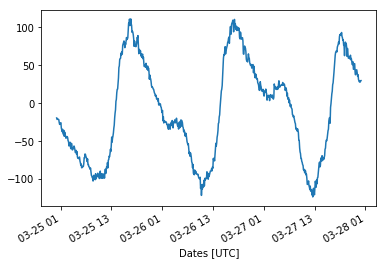

In [8]:
tdf['g06010: Along [cm/s]'].plot() #add [] cells like with ['2018-3-25 04:30':'2018-3-25 05:30'] below and add on to tell which part to be overlayed with red or something

# plot salinity data

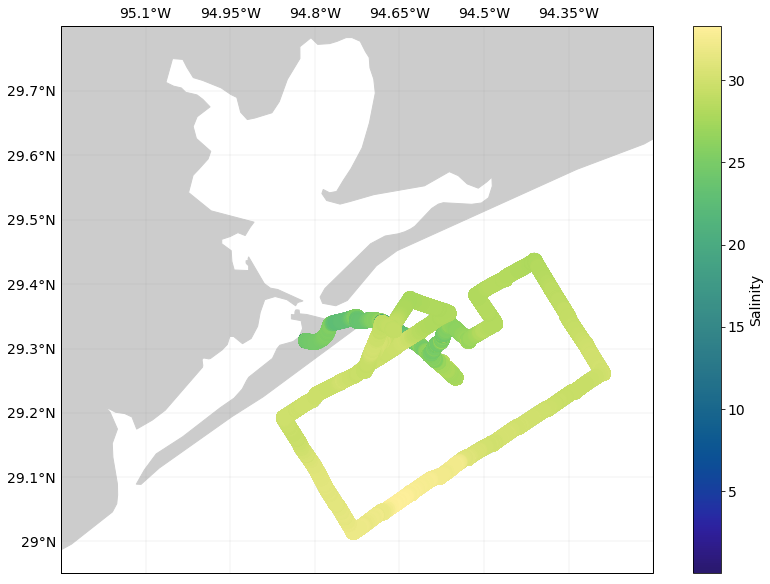

In [19]:
# Figure with Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.25, -94.2, 28.95, 29.8], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc, zorder=10)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

In [22]:
type(ax)

cartopy.mpl.geoaxes.GeoAxes

In [ ]:
# Figure without Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc, zorder=10)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

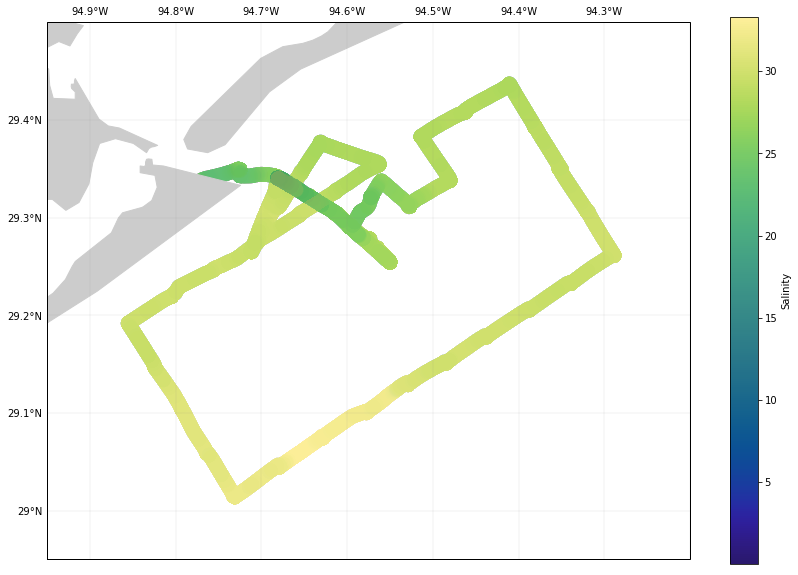

In [83]:
# Figure without Galveston Bay and added transparency
fig = plt.figure(figsize=(12, 8))# (9.4, 7.7)

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc, alpha=0.01)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

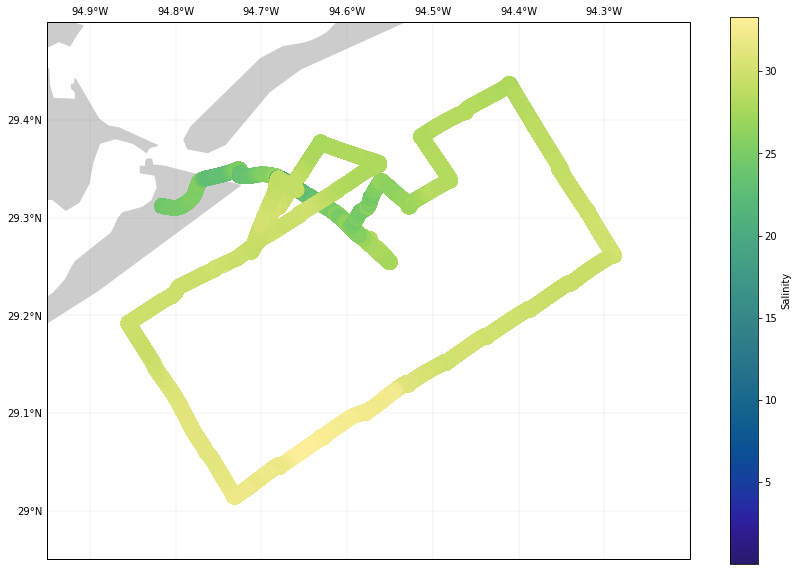

In [10]:
# Figure without Galveston Bay
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon'], df['ADU800-GGA-Lat'], c=df['Thermosalinograph-Data-Salinity'], s=200, cmap=cmo.haline, transform=pc, zorder=10)
cb = fig.colorbar(mappable)
cb.set_label('Salinity')

In [86]:
df.columns

Index(['ADU800-GGA-Lat', 'ADU800-GGA-Lon', 'Sperry-MK1-Gyro-Hdg-deg',
       'Furuno-SC50-GPS-Hdg-Hdg', 'Knudsen-True-Depth-DRV-VALUE',
       'Thermosalinograph-Data-Temp', 'Thermosalinograph-Data-Salinity',
       'Thermosalinograph-Data-Conductivity',
       'Thermosalinograph-Data-Sound-Velocity',
       'Transmissometer-percent-DRV-VALUE',
       'Wetstar-Flourometer-microgperL-DRV-VALUE', 'SPAR-Voltage-DRV-VALUE',
       'SPAR-Microeinsteins-DRV-VALUE', 'Air-Temp-1-VALUE',
       'Rel-Humidity-1-VALUE', 'BaromPress-1-VALUE', 'Rel-Winddir-1-VALUE',
       'Rel-Windspd-1-VALUE', 'True-Wind-1-DRV-DIRECTION',
       'True-Wind-1-DRV-SPEED', 'Air-Temp-2', 'Rel-Humidity-2', 'BaromPress-2',
       'Rel-WindDir-2', 'Rel-WindSpd-2', 'True-Wind-2-DRV-DIRECTION',
       'True-Wind-2-DRV-SPEED', 'Unnamed: 29'],
      dtype='object')

In [152]:
df['ADU800-GGA-Lon']['2018-3-25 04:50':'2018-3-25 06:00']

Date_Time
2018-03-25 04:50:00   -94.815759
2018-03-25 04:50:01   -94.815759
2018-03-25 04:50:02   -94.815759
2018-03-25 04:50:03   -94.815759
2018-03-25 04:50:04   -94.815759
2018-03-25 04:50:05   -94.815759
2018-03-25 04:50:06   -94.815759
2018-03-25 04:50:07   -94.815759
2018-03-25 04:50:08   -94.815759
2018-03-25 04:50:09   -94.815759
2018-03-25 04:50:10   -94.815759
2018-03-25 04:50:11   -94.815759
2018-03-25 04:50:12   -94.815759
2018-03-25 04:50:13   -94.815759
2018-03-25 04:50:14   -94.815759
2018-03-25 04:50:15   -94.815759
2018-03-25 04:50:16   -94.815759
2018-03-25 04:50:17   -94.815759
2018-03-25 04:50:18   -94.815759
2018-03-25 04:50:19   -94.815759
2018-03-25 04:50:20   -94.815759
2018-03-25 04:50:21   -94.815759
2018-03-25 04:50:22   -94.815759
2018-03-25 04:50:23   -94.815759
2018-03-25 04:50:24   -94.815759
2018-03-25 04:50:25   -94.815759
2018-03-25 04:50:26   -94.815759
2018-03-25 04:50:27   -94.815759
2018-03-25 04:50:28   -94.815759
2018-03-25 04:50:29   -94.815759


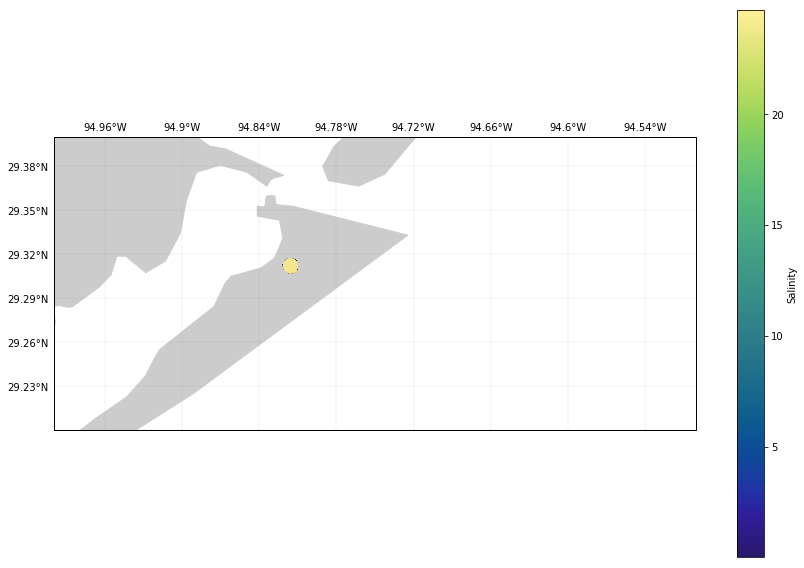

In [7]:
# Figure with Galveston Bay based on hours 4:30-5:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 04:30':'2018-3-25 05:30'], df['ADU800-GGA-Lat']['2018-3-25 04:30':'2018-3-25 05:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 04:30':'2018-3-25 05:30'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1, zorder=10)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

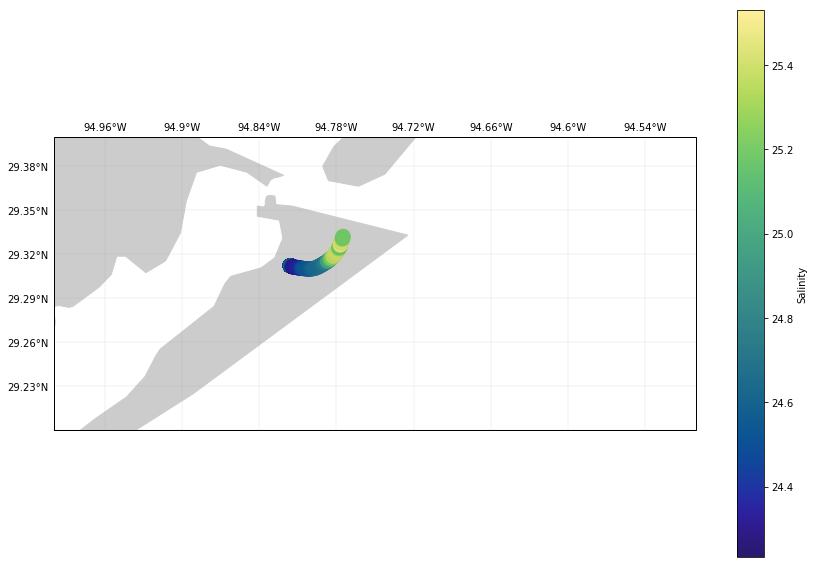

In [9]:
# Figure with Galveston Bay based on hours 5:30-6:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 05:30':'2018-3-25 06:30'], df['ADU800-GGA-Lat']['2018-3-25 05:30':'2018-3-25 06:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 05:30':'2018-3-25 06:30'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1, zorder=10)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

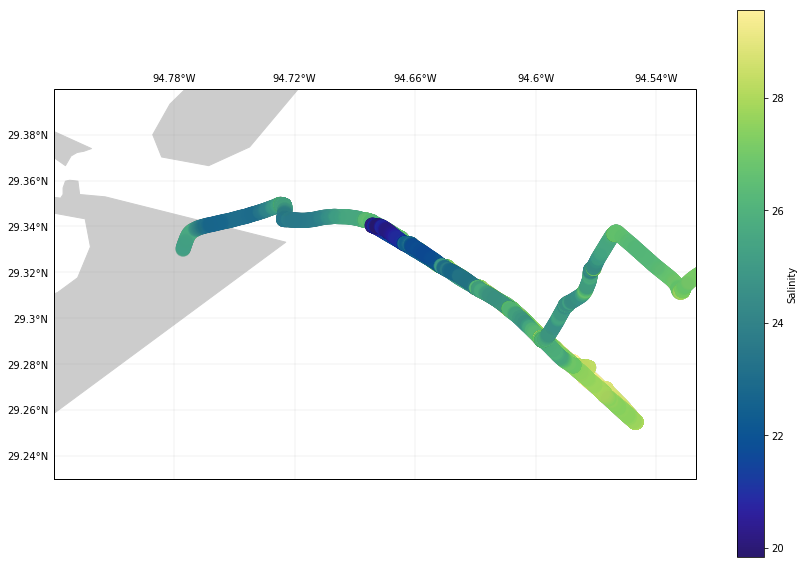

In [17]:
# Figure with Galveston Bay based on hours 6:30-7:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box



#extent controls bounds of cruise
ax.set_extent([-94.84, -94.52, 29.23, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')
mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 06:30':'2018-3-25 016:30'], df['ADU800-GGA-Lat']['2018-3-25 06:30':'2018-3-25 16:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 06:30':'2018-3-25 16:30'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1, zorder=10)





cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

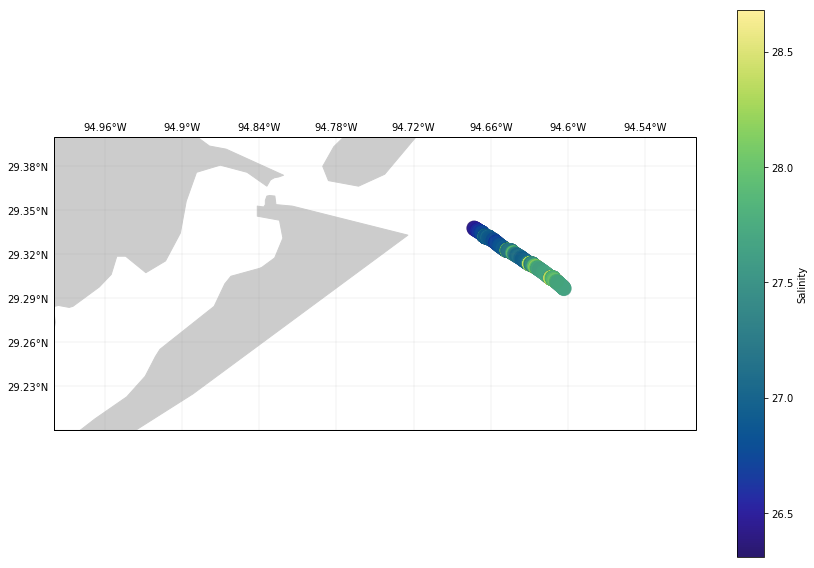

In [12]:
# Figure with Galveston Bay based on hours 7:30-8:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 07:30':'2018-3-25 08:30'], df['ADU800-GGA-Lat']['2018-3-25 07:30':'2018-3-25 08:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 07:30':'2018-3-25 08:30'], s=200, cmap=cmo.haline, transform=pc,alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

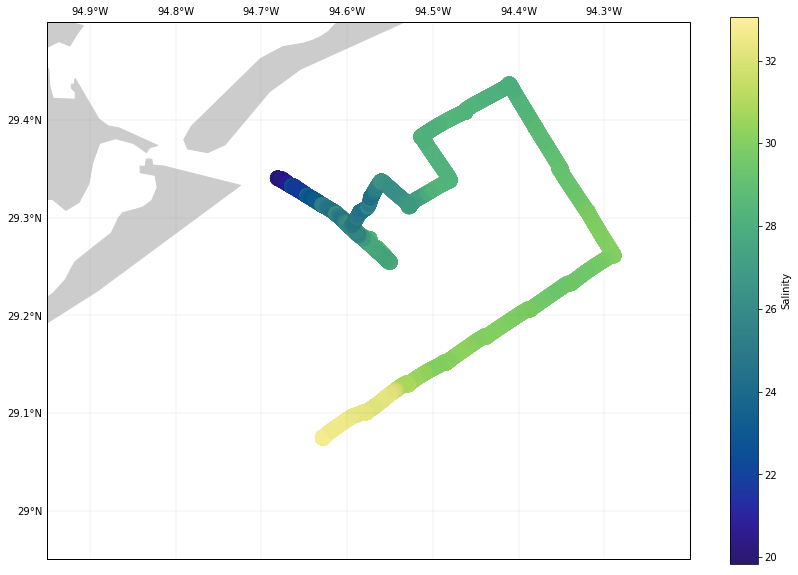

In [11]:
# Figure with Galveston Bay based on hours 8:30-22:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-94.95, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 8:30':'2018-3-25 22:30'], df['ADU800-GGA-Lat']['2018-3-25 8:30':'2018-3-25 22:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 8:30':'2018-3-25 22:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

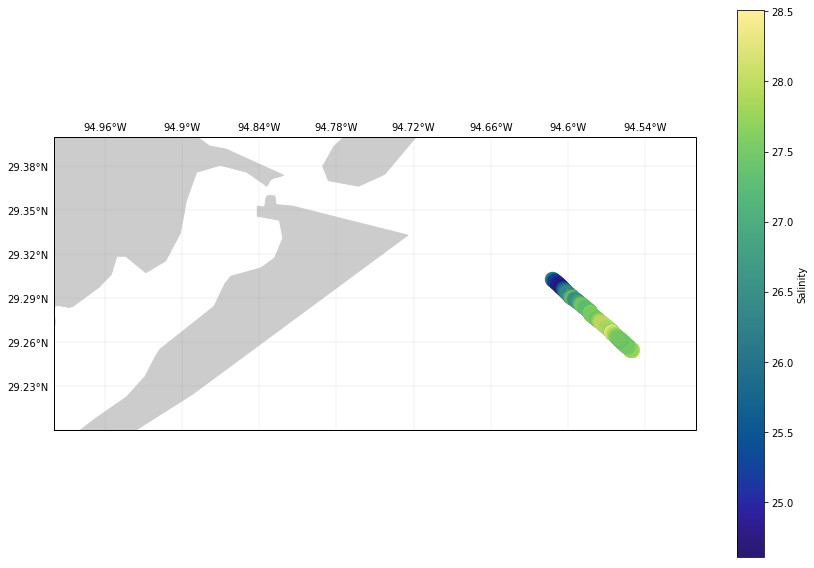

In [13]:
# Figure with Galveston Bay based on hours 12:30-13:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 12:30':'2018-3-25 13:30'], df['ADU800-GGA-Lat']['2018-3-25 12:30':'2018-3-25 13:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 12:30':'2018-3-25 13:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

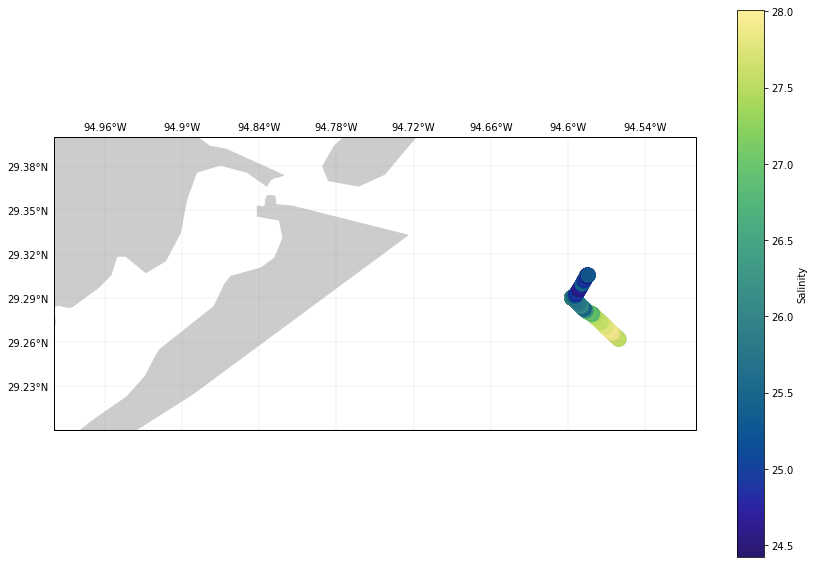

In [9]:
# Figure with Galveston Bay based on hours 13:30-14:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 13:30':'2018-3-25 14:30'], df['ADU800-GGA-Lat']['2018-3-25 13:30':'2018-3-25 14:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 13:30':'2018-3-25 14:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

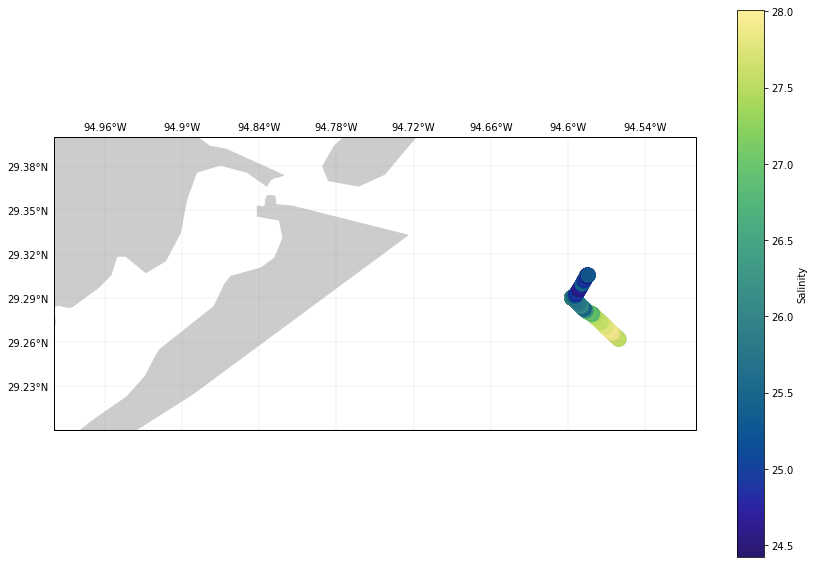

In [10]:
# Figure with Galveston Bay based on hours 13:30-14:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 13:30':'2018-3-25 14:30'], df['ADU800-GGA-Lat']['2018-3-25 13:30':'2018-3-25 14:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 13:30':'2018-3-25 14:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

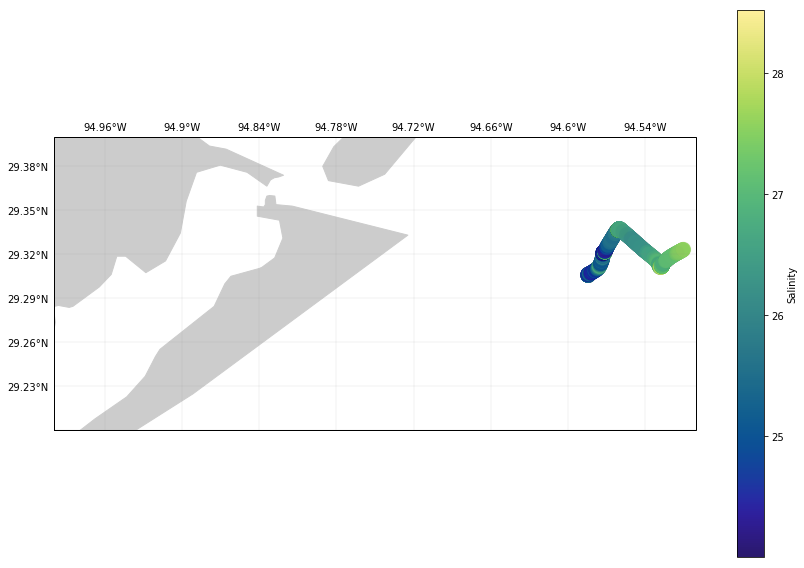

In [11]:
# Figure with Galveston Bay based on hours 14:30-15:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.5, 29.2, 29.4], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 14:30':'2018-3-25 15:30'], df['ADU800-GGA-Lat']['2018-3-25 14:30':'2018-3-25 15:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 14:30':'2018-3-25 15:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

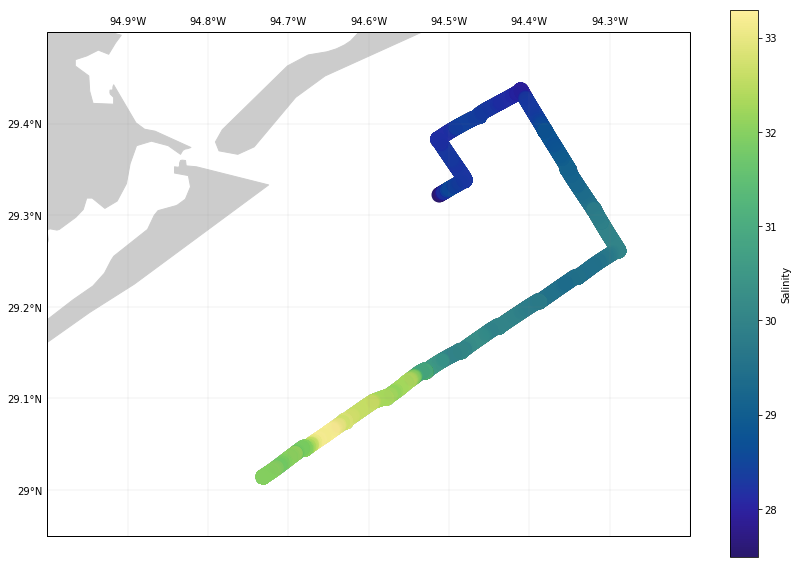

In [12]:
# Figure with Galveston Bay based on hours 15:30-23:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 15:30':'2018-3-25 23:30'], df['ADU800-GGA-Lat']['2018-3-25 15:30':'2018-3-25 23:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 15:30':'2018-3-25 23:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

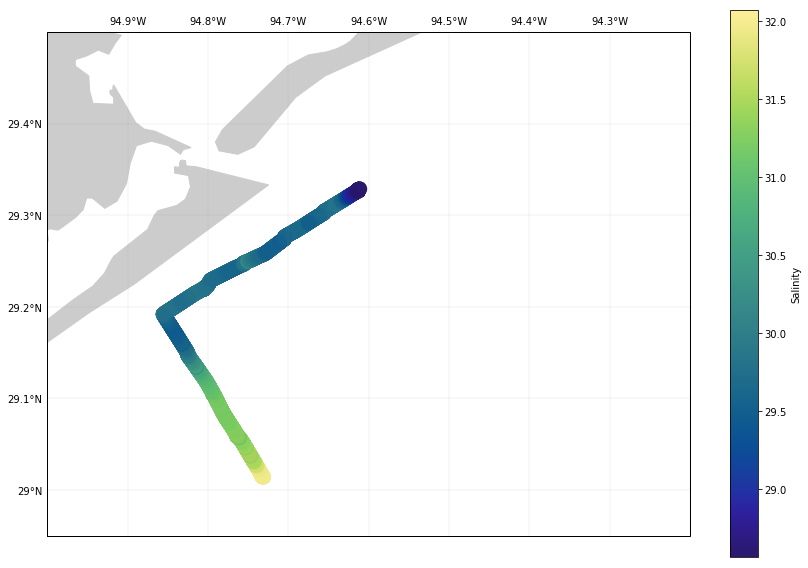

In [13]:
# Figure with Galveston Bay based on hours 23:30-3:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-25 23:30':'2018-3-26 3:30'], df['ADU800-GGA-Lat']['2018-3-25 23:30':'2018-3-26 3:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-25 23:30':'2018-3-26 3:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

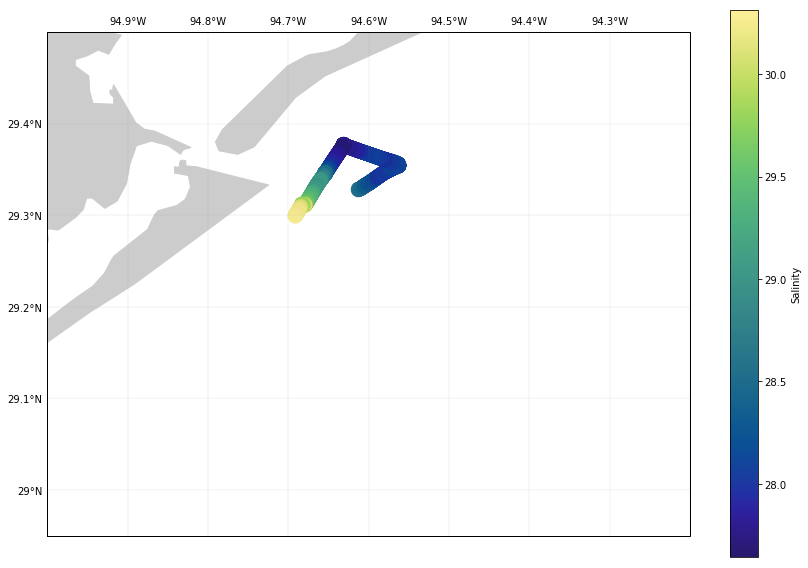

In [14]:
# Figure with Galveston Bay based on hours 3:30-5:30
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 3:30':'2018-3-26 5:30'], df['ADU800-GGA-Lat']['2018-3-26 3:30':'2018-3-26 5:30'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 3:30':'2018-3-26 5:30'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

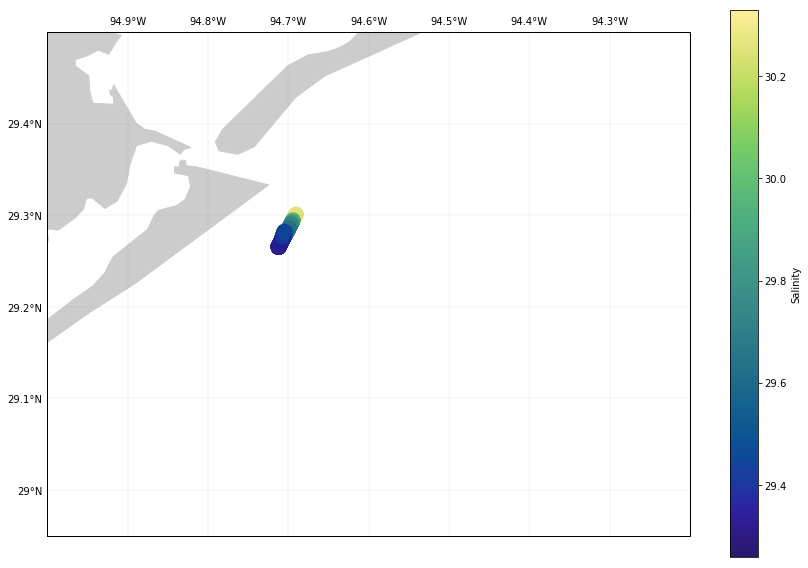

In [15]:
# Figure with Galveston Bay based on hours 5:30-6:00
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 5:30':'2018-3-26 6:00'], df['ADU800-GGA-Lat']['2018-3-26 5:30':'2018-3-26 6:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 5:30':'2018-3-26 6:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

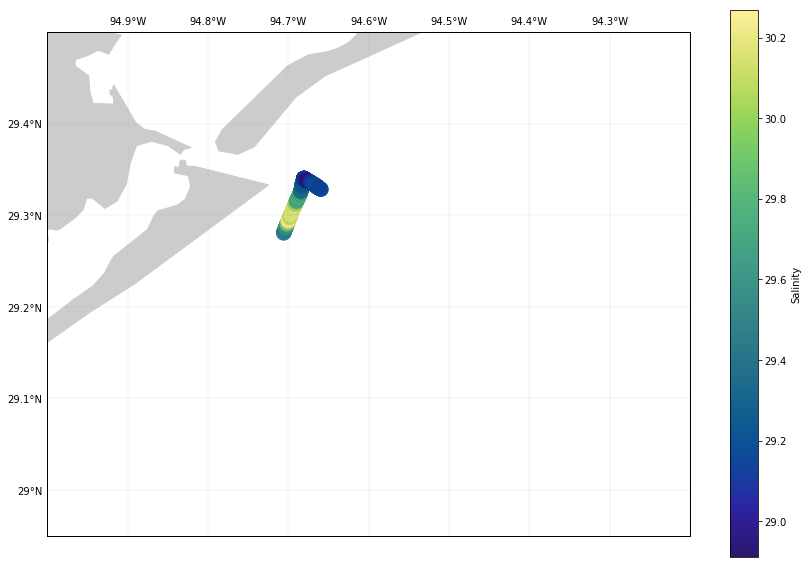

In [16]:
# Figure with Galveston Bay based on hours 6:00-7:00
fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
ax.set_frame_on(False) # kind of like it without the box
#extent controls bounds of cruise
ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# the following two make the labels look like lat/lon format
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_bottom = False  # turn off labels where you don't want them
gl.ylabels_right = False
ax.add_feature(land_10m, facecolor='0.8')
ax.set_facecolor('0.8')

mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 6:00':'2018-3-26 7:00'], df['ADU800-GGA-Lat']['2018-3-26 6:00':'2018-3-26 7:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 6:00':'2018-3-26 7:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
cb = fig.colorbar(mappable)
cb.set_alpha(1)
cb.draw_all()
cb.set_label('Salinity')

In [17]:
# # Figure with Galveston Bay based on hours 7:00-8:00
# fig = plt.figure(figsize=(12, 8)) # (9.4, 7.7))

# ax = fig.add_axes([0.06, 0.01, 0.93, 0.95], projection=merc)
# ax.set_frame_on(False) # kind of like it without the box
# #extent controls bounds of cruise
# ax.set_extent([-95.0, -94.2, 28.95, 29.5], pc)
# gl = ax.gridlines(linewidth=0.2, color='gray', alpha=0.5, linestyle='-', draw_labels=True)
# # the following two make the labels look like lat/lon format
# gl.xformatter = LONGITUDE_FORMATTER
# gl.yformatter = LATITUDE_FORMATTER
# gl.xlabels_bottom = False  # turn off labels where you don't want them
# gl.ylabels_right = False
# ax.add_feature(land_10m, facecolor='0.8')
# ax.set_facecolor('0.8')

# mappable = ax.scatter(df['ADU800-GGA-Lon']['2018-3-26 7:00':'2018-3-26 8:00'], df['ADU800-GGA-Lat']['2018-3-26 7:00':'2018-3-26 8:00'], c=df['Thermosalinograph-Data-Salinity']['2018-3-26 7:00':'2018-3-26 8:00'], s=200, cmap=cmo.haline, transform=pc, alpha=0.1)
# cb = fig.colorbar(mappable)
# cb.set_alpha(1)
# cb.draw_all()
# cb.set_label('Salinity')

IndexError: Out of bounds on buffer access (axis 0)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x110ea5f28> (for post_execute):


IndexError: Out of bounds on buffer access (axis 0)

IndexError: Out of bounds on buffer access (axis 0)

In [16]:
(df['ADU800-GGA-Lon']['2018-3-26 6:00':'2018-3-26 7:59'])

Date_Time
2018-03-26 06:00:00   -94.705844
2018-03-26 06:00:01   -94.705828
2018-03-26 06:00:02   -94.705813
2018-03-26 06:00:03   -94.705798
2018-03-26 06:00:04   -94.705783
2018-03-26 06:00:05   -94.705769
2018-03-26 06:00:06   -94.705753
2018-03-26 06:00:07   -94.705736
2018-03-26 06:00:08   -94.705718
2018-03-26 06:00:09   -94.705701
2018-03-26 06:00:10   -94.705684
2018-03-26 06:00:11   -94.705668
2018-03-26 06:00:12   -94.705653
2018-03-26 06:00:13   -94.705637
2018-03-26 06:00:14   -94.705620
2018-03-26 06:00:15   -94.705603
2018-03-26 06:00:16   -94.705586
2018-03-26 06:00:17   -94.705567
2018-03-26 06:00:18   -94.705549
2018-03-26 06:00:19   -94.705533
2018-03-26 06:00:20   -94.705517
2018-03-26 06:00:21   -94.705501
2018-03-26 06:00:22   -94.705485
2018-03-26 06:00:23   -94.705468
2018-03-26 06:00:24   -94.705450
2018-03-26 06:00:25   -94.705431
2018-03-26 06:00:26   -94.705412
2018-03-26 06:00:27   -94.705394
2018-03-26 06:00:28   -94.705376
2018-03-26 06:00:29   -94.705360


In [17]:
df.tail(10)

,ADU800-GGA-Lat,ADU800-GGA-Lon,Sperry-MK1-Gyro-Hdg-deg,Furuno-SC50-GPS-Hdg-Hdg,Knudsen-True-Depth-DRV-VALUE,Thermosalinograph-Data-Temp,Thermosalinograph-Data-Salinity,Thermosalinograph-Data-Conductivity,Thermosalinograph-Data-Sound-Velocity,Transmissometer-percent-DRV-VALUE,...,True-Wind-1-DRV-DIRECTION,True-Wind-1-DRV-SPEED,Air-Temp-2,Rel-Humidity-2,BaromPress-2,Rel-WindDir-2,Rel-WindSpd-2,True-Wind-2-DRV-DIRECTION,True-Wind-2-DRV-SPEED,Unnamed: 29
Date_Time,,,,,,,,,,,,,,,,,,,,,
2018-03-26 06:48:40,29.328459,-94.659293,115.38,115.5,14.04,20.87776,29.14704,4.144299,1517.388,54.72,...,175.09,8.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:41,29.328440,-94.659250,114.96,114.9,12.04,20.87502,29.14811,4.144196,1517.381,54.92,...,167.28,9.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:42,29.328421,-94.659209,115.52,115.5,13.51,20.87502,29.14811,4.144196,1517.381,54.72,...,168.35,9.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:43,29.328401,-94.659165,114.94,114.9,11.32,20.87502,29.14811,4.144196,1517.381,54.72,...,175.09,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:44,29.328381,-94.659118,114.99,114.9,2.90,20.87502,29.14811,4.144196,1517.381,54.72,...,173.89,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:45,29.328364,-94.659080,115.20,115.2,12.85,20.87502,29.14811,4.144196,1517.381,54.72,...,175.88,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:46,29.328345,-94.659037,115.80,115.8,14.45,20.86953,29.15023,4.143990,1517.369,54.92,...,179.38,8.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:47,29.328326,-94.658993,115.22,115.2,14.46,20.86953,29.15023,4.143990,1517.369,55.12,...,169.51,8.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-26 06:48:48,29.328307,-94.658949,115.54,115.3,11.18,20.86953,29.15023,4.143990,1517.369,55.12,...,174.38,8.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
